In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"D:\Basics\datasets\PROJECT\netflix_titles.csv")
# Loading dataset from CSV into a DataFrame


In [2]:
#Importing necessary tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
print("Data shape is showing as:", df.shape)
print("Data info is being shown:")
print(df.info())
print("Missing values per column are showing:")
print(df.isna().sum())

Data shape is showing as: (8807, 12)
Data info is being shown:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
Missing values per column are showing:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        1

In [4]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
# Executing primary changes

#Handling missing values
df.dropna(axis=0, subset=['date_added', 'rating', 'duration'], inplace=True, ignore_index=True) # Dropping rows

# Filling remaining missing values in director, cast, and country with placeholder
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown'}, inplace=True)

# Converting 'date_added' to datetime for easier feature extraction
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extracting year and month when title is being added to Netflix
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

# Converting duration string into numeric value (minutes or seasons)
df['duration_num'] = df['duration'].apply(lambda x: int(x.split(' ')[0]))

# Creating a binary indicator showing if the title is being listed as TV show (season-based)
df['is_tv_show'] = df['duration'].apply(lambda x: 1 if 'Season' in x else 0)


In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,duration_num,is_tv_show
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,158,0
8786,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,2,1
8787,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,88,0
8788,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,88,0


C:\Users\USER\AppData\Local\Temp\ipykernel_14064\3612275252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


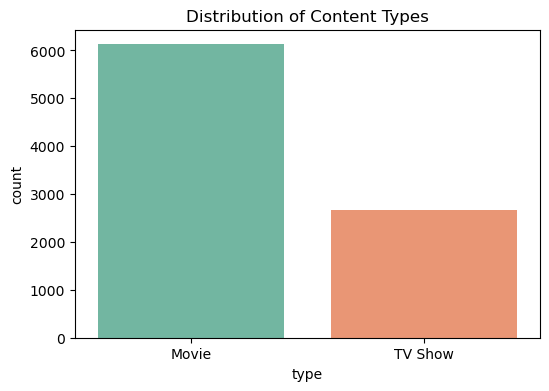

In [7]:

# 1. Distribution of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types')
plt.show()




In [8]:
# Our Finding suggest that Distribution of Movies is vast as compared to Tv shows

C:\Users\USER\AppData\Local\Temp\ipykernel_14064\920269088.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set3')


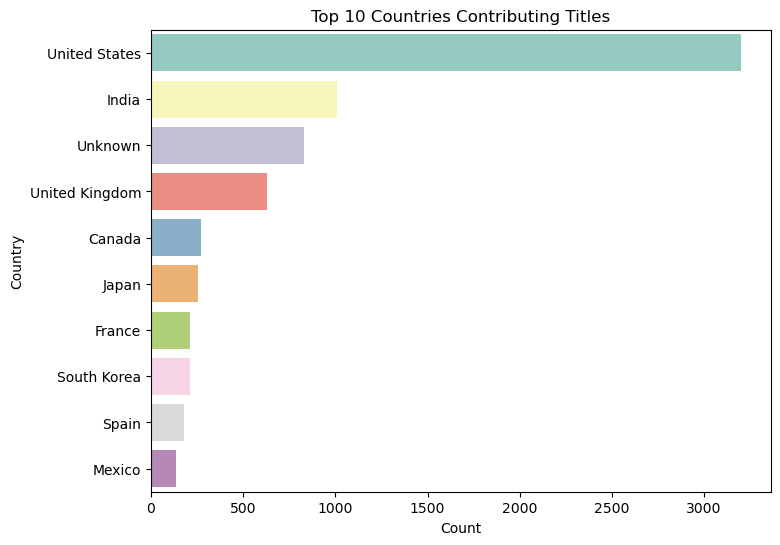

In [9]:
# 2. Top Countries Represented in Titles
df['first_country'] = df['country'].fillna('Unknown').apply(lambda x: x.split(',')[0])
top_countries = df['first_country'].value_counts().nlargest(10)
plt.figure(figsize=(8,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set3')
plt.title('Top 10 Countries Contributing Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [10]:
# Here we found that United states contributes in distributing the most titles

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initializing LabelEncoder
le_country = LabelEncoder()
le_genre = LabelEncoder()

# Fitting and transforming categorical columns
df['country_encoded'] = le_country.fit_transform(df['country'])
df['listed_in_encoded'] = le_genre.fit_transform(df['listed_in'])

# Using encoded columns as features
X = df[['country_encoded', 'listed_in_encoded']]
y = df['type']

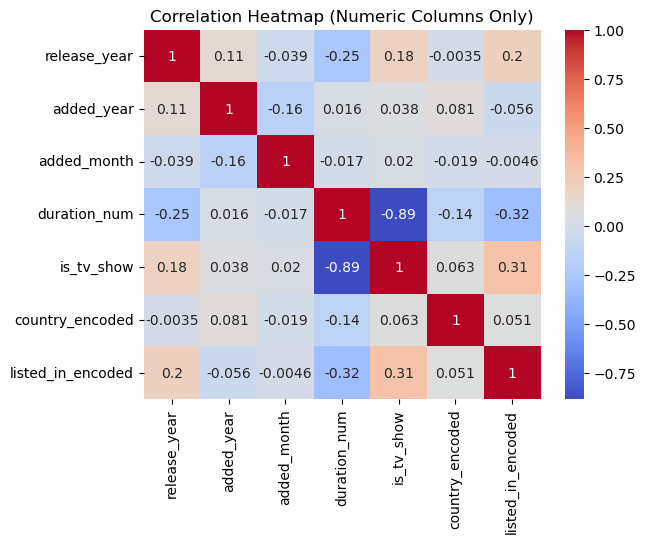

In [12]:
 # Checking correlation between numerical features (HeatMap Type)
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

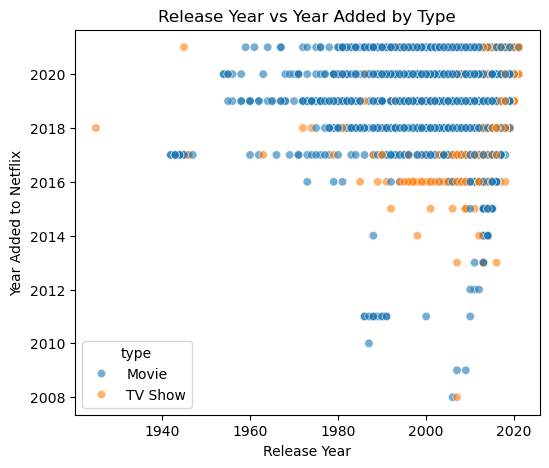

In [13]:
# 5. Correlation Release Year vs Year Added (scatterplot type)
df.dropna(subset=['release_year','added_year'], inplace=True)
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='release_year', y='added_year', hue='type', alpha=0.6)
plt.title('Release Year vs Year Added by Type')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.show()

In [14]:
# Here we found out that Recent medias are added in less time than older medias

In [15]:
# Encoding the target 'type' to numeric
le_type = LabelEncoder()
df['type_encoded'] = le_type.fit_transform(df['type'])  # Movie=0, TV Show=1 (example)
y = df['type_encoded']

In [16]:
# Encoding categorical features
le_country = LabelEncoder()
le_genre = LabelEncoder()

df['country_encoded'] = le_country.fit_transform(df['country'].astype(str))
df['listed_in_encoded'] = le_genre.fit_transform(df['listed_in'].astype(str))

# Selecting features
X = df[['country_encoded', 'listed_in_encoded']]

from sklearn.model_selection import train_test_split
# Splitting the data without stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
# Initializing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)  #( we chose randomforest classifier for our prediction)

# Training the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Making predictions
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
# Evaluating performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_type.classes_))

Accuracy: 0.9971280873061459
Confusion Matrix:
 [[1192    0]
 [   5  544]]
Classification Report:
               precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1192
     TV Show       1.00      0.99      1.00       549

    accuracy                           1.00      1741
   macro avg       1.00      1.00      1.00      1741
weighted avg       1.00      1.00      1.00      1741



In [19]:
findings = """
The Random Forest classifier performed exceptionally well in predicting whether a Netflix title is a Movie or TV Show, achieving an accuracy of 99.7% on the test set. 
The confusion matrix indicates that 1192 Movies and 544 TV Shows were correctly classified, with only 5 TV Shows misclassified as Movies. 
The classification report shows very high precision, recall, and F1-scores for both classes, highlighting that the model is highly reliable. 
The slightly lower recall for TV Shows is likely due to the dataset containing fewer TV Shows compared to Movies. 
Features such as country and genre (listed_in) proved to be highly predictive, enabling the model to effectively distinguish between Movies and TV Shows. 
Overall, the model demonstrates excellent performance and can be confidently used to predict the type of Netflix titles based on available features.
"""

print(findings)


The Random Forest classifier performed exceptionally well in predicting whether a Netflix title is a Movie or TV Show, achieving an accuracy of 99.7% on the test set. 
The confusion matrix indicates that 1192 Movies and 544 TV Shows were correctly classified, with only 5 TV Shows misclassified as Movies. 
The classification report shows very high precision, recall, and F1-scores for both classes, highlighting that the model is highly reliable. 
The slightly lower recall for TV Shows is likely due to the dataset containing fewer TV Shows compared to Movies. 
Features such as country and genre (listed_in) proved to be highly predictive, enabling the model to effectively distinguish between Movies and TV Shows. 
Overall, the model demonstrates excellent performance and can be confidently used to predict the type of Netflix titles based on available features.



In [20]:
# Cross validating our predicted outcome
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') # We used k fold cross validation technique for this one
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.9902355  0.99310741 0.9954023  0.99367816 0.9954023 ]
Mean accuracy: 0.9935651329992672


In [21]:
# Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for Random Forest

param_grid = {
    'n_estimators': [100, 200, 300],      # Trying 100, 200, and 300 trees
    'max_depth': [None, 10, 20],          # Trying unlimited depth, 10, and 20 as maximum tree depth
    'min_samples_split': [2, 5, 10]       # Trying minimum samples required to split a node
}

# Initializing GridSearchCV to search for the best hyperparameters using 5-fold cross-validation

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fitting GridSearchCV to the training data

grid_search.fit(X_train, y_train)

# Printing the best combination of hyperparameters found
print("Best parameters:", grid_search.best_params_)

# Printing the best cross-validated accuracy obtained with the best hyperparameters
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validated accuracy: 0.9952597552623544


In [22]:
# here we found out that n estimators for best accuracy were 300,max depth was none and 5 splits for sample splits

In [23]:
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,duration_num,is_tv_show,first_country,country_encoded,listed_in_encoded,type_encoded
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90,0,United States,600,271,0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2,1,South Africa,424,410,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1,1,Unknown,733,239,1
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1,1,Unknown,733,294,1
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2,1,India,251,389,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,158,0,United States,600,266,0
8786,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,2,1,Unknown,733,420,1
8787,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,88,0,United States,600,204,0
8788,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,88,0,United States,600,124,0


In [24]:
# Terminal input 
country_input = input("Enter Country: ") 
genre_input = input("Enter Genre Listed In: ") 
country_encoded = le_country.transform([country_input])[0] 
genre_encoded = le_genre.transform([genre_input])[0] 
prediction = model.predict([[country_encoded, genre_encoded]])
predicted_type = le_type.inverse_transform(prediction)[0] 
print(f"The predicted Netflix title type is: {predicted_type}")

The predicted Netflix title type is: Movie


d:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
! pip install streamlit

In [26]:
import pickle

# Saving the trained model
with open("netflix_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Saving the encoders
with open("le_country.pkl", "wb") as f:
    pickle.dump(le_country, f)

with open("le_genre.pkl", "wb") as f:
    pickle.dump(le_genre, f)

with open("le_type.pkl", "wb") as f:
    pickle.dump(le_type, f)